In [ ]:
#packages to be imported

import pandas as pd  #for loading and manipulating a dataset
from sklearn.model_selection import train_test_split  #to split the dataset into train and test set
from sklearn.preprocessing import StandardScaler  #to standardize the dataset
from sklearn.tree import DecisionTreeClassifier  #to define by which method decision tree has to be implemented
from sklearn.metrics import confusion_matrix  #to determine the performance of classification models 
from sklearn.tree import export_graphviz  #to display the decision tree execution
import graphviz

In [ ]:
#import the dataset "cars.csv"
df = pd.read_csv('cars.csv')
df.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [ ]:
#since strings can't be standardized we are changing gender into binary form
df['gender'].replace({'Male':1, 'Female':0}, inplace=True)
df.head(10)

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438
5,58,1,18,0,1262,2102
6,44,1,17,418,7017,8520
7,39,1,28,0,3282,500
8,44,0,24,48724,9980,22997
9,46,1,46,57827,8163,26517


In [ ]:
#finding target variable and features to classify 
X = df[['gender','age']]
Y = df[['income']]

In [ ]:
#splitting the dataset for training and testing
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size = 0.5, random_state=0)
print(X_train)


     gender  age
913       1   55
96        0   55
566       0   25
826       1   19
527       1   57
..      ...  ...
835       0   35
192       0   47
629       1   23
559       1   29
684       0   29

[481 rows x 2 columns]


In [ ]:
#standardizing the dataset
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [ ]:
#training the model using train dataset
clf = DecisionTreeClassifier(criterion = "gini",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#finding the predicted value for x_test dataset
Y_pred =clf.predict(X_test)

In [ ]:
#determining the performance of the model
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[9, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

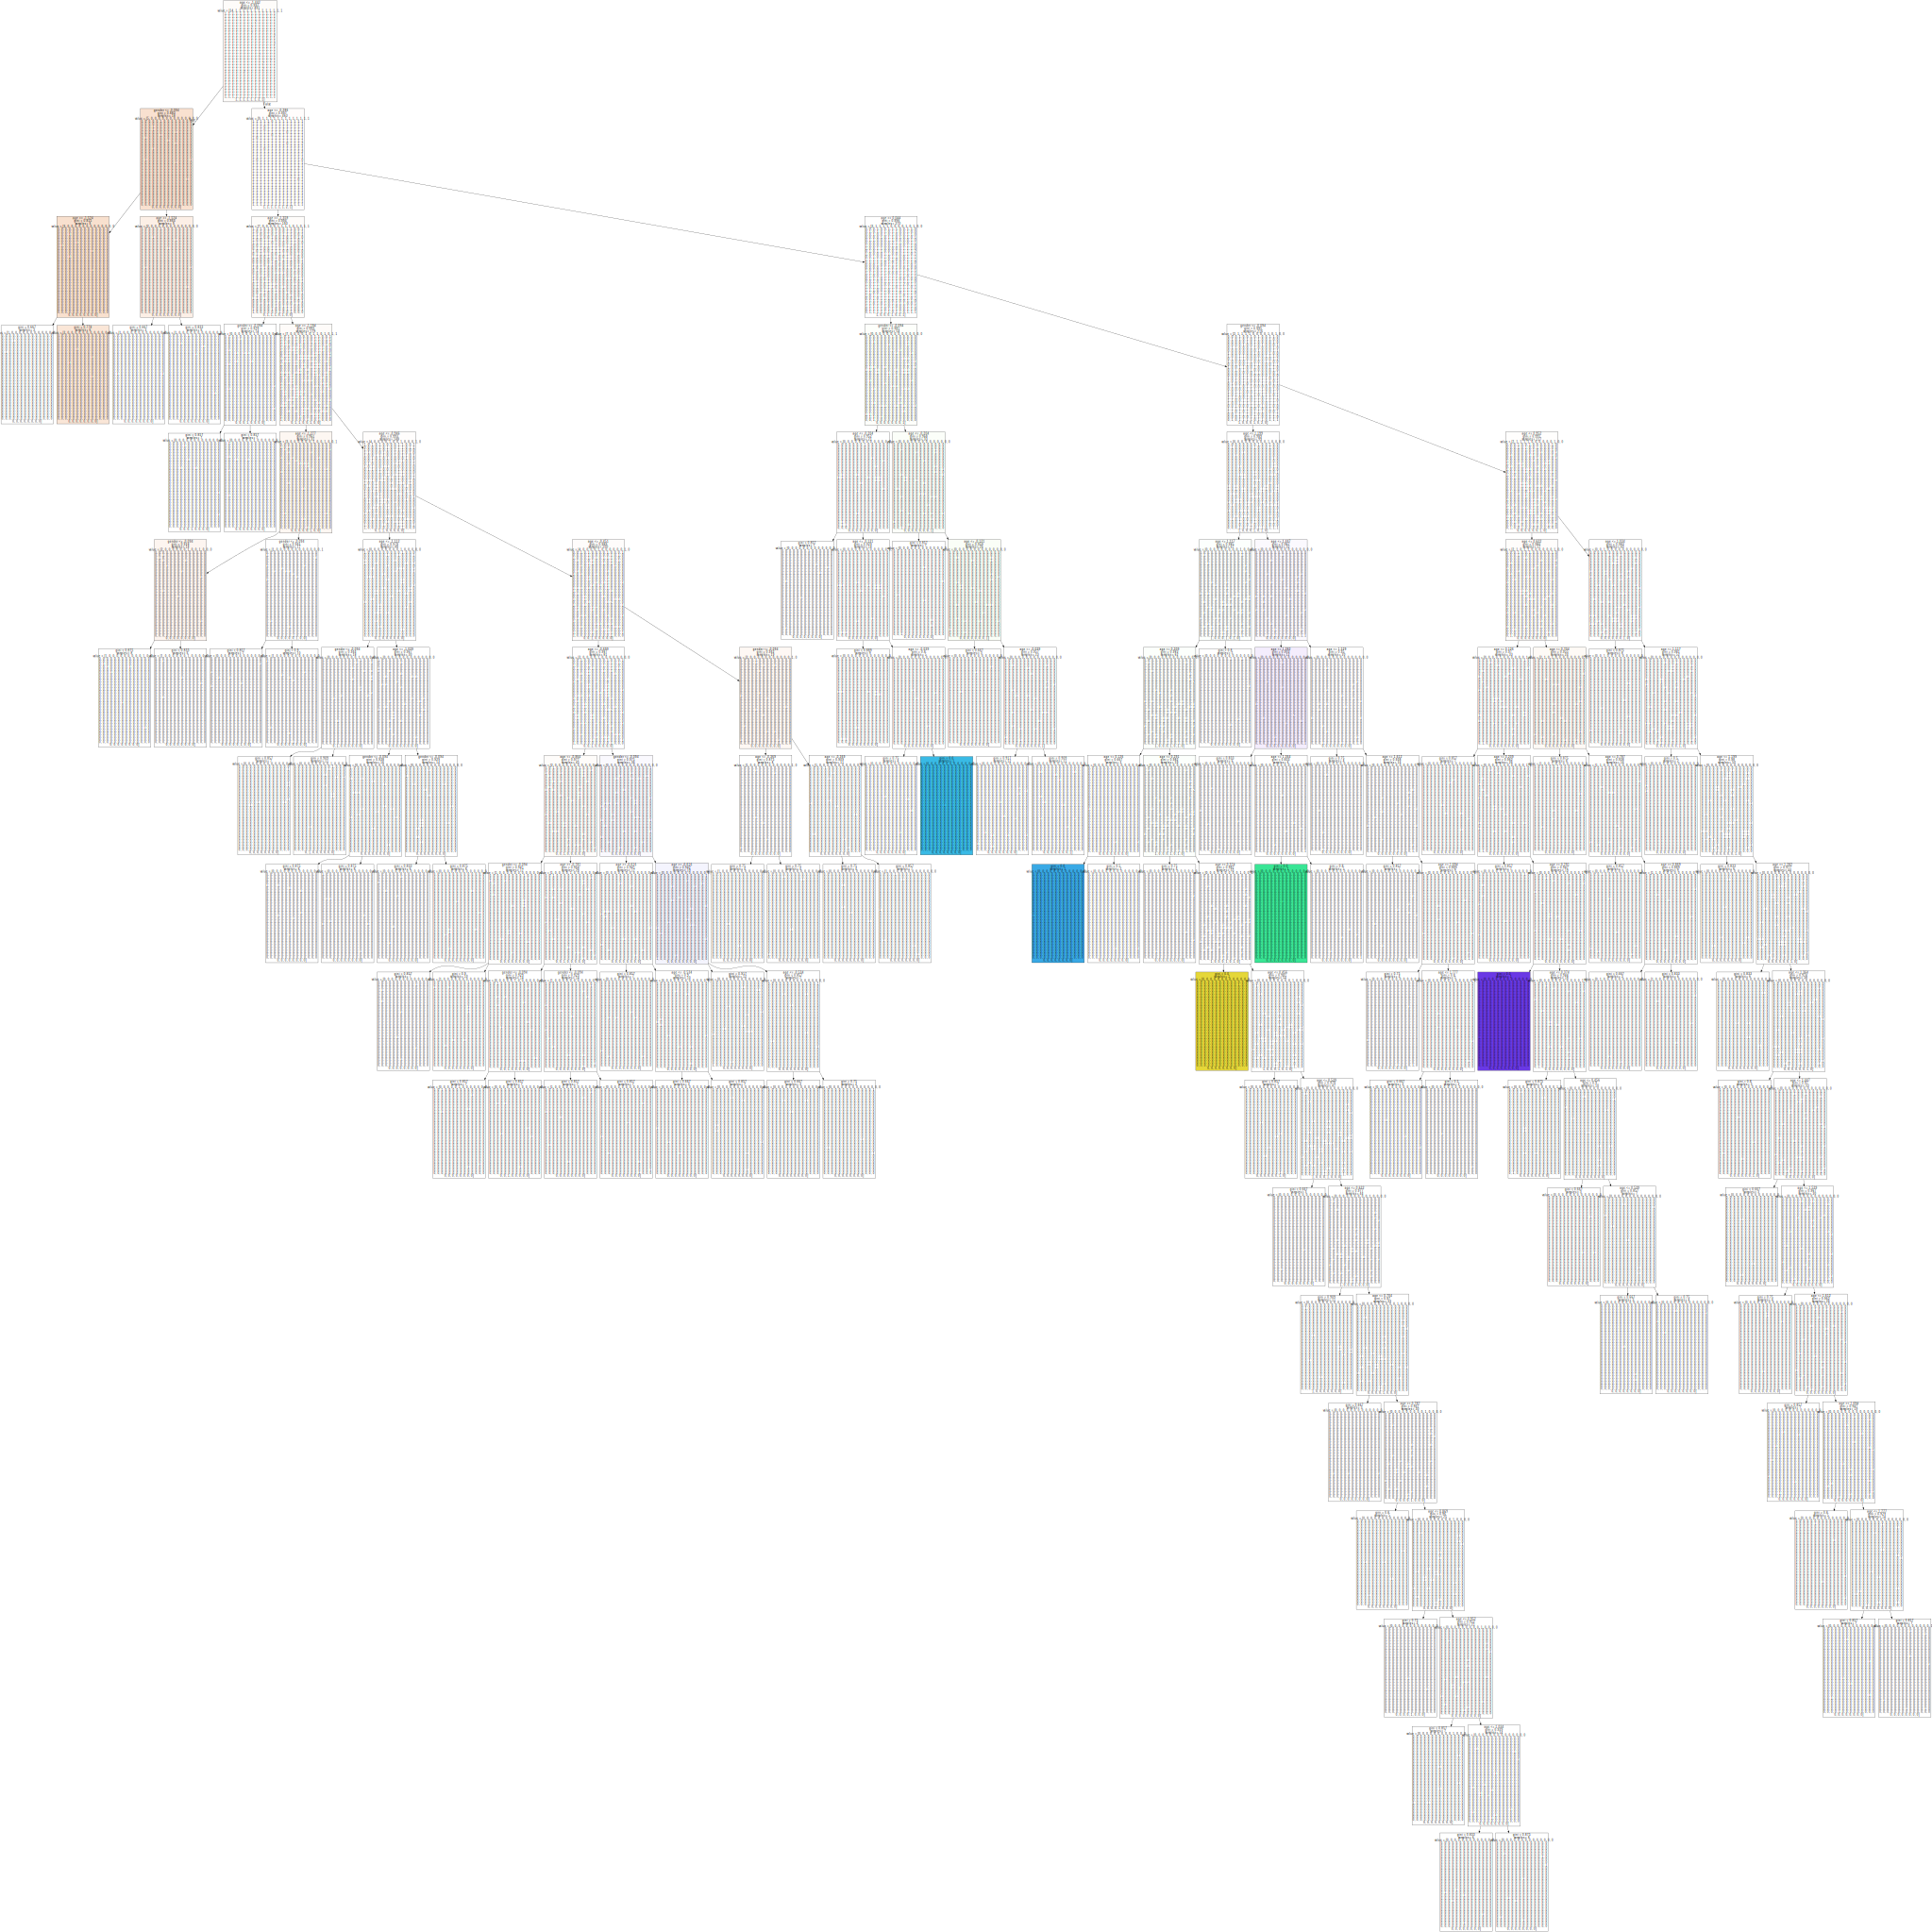

In [ ]:
#displaying decision tree
graphviz.Source(export_graphviz(clf,feature_names = X.columns,filled = True))